In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import textwrap

# for custom system fonts
import os
from matplotlib import font_manager as fm

In [2]:
# grab system font
fpath = os.path.join('/Users/marley/Library/Fonts/CENSCBK.TTF')
prop = fm.FontProperties(fname=fpath, size=10)
fname = os.path.split(fpath)[1]   

In [3]:
# set params for AI export
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [81]:
folder = sorted(os.listdir('data_files'))

files_ch1 = []
files_ch2 = []
files_ch6 = []
files_ch7 = []

for file in folder:
    if file[2:3] == '1':
        files_ch1.append(file)
    elif file[2:3] == '2':
        files_ch2.append(file)
    elif file[2:3] == '6':
        files_ch6.append(file)
    elif file[2:3] == '7':
        files_ch7.append(file)
    else:
        pass

In [5]:
# define key graphing functions and their scalars
width = 0.225

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            labelheight = height + bartextheight_pos
        else:
            labelheight = height - bartextheight_neg
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, labelheight),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 

In [6]:
def graph_pct_dbl(g, ylim, chars, filename, bartextheight_pos, bartextheight_neg):
    # set graph specs
    width = 0.225
    legendheight = -0.2
    title = g.index.name#[:-11]
    
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                labelheight = height + bartextheight_pos
            else:
                labelheight = height - bartextheight_neg
            ax.annotate(str((height * 100).round(1)) + '%',
                        xy=(bar.get_x() + bar.get_width()/2, labelheight),
                        ha='center',
                        fontproperties=prop,
                        fontsize=bartextsize)
    
    # run graph code    
    fig, ax = plt.subplots(figsize=(9,5))
    ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
    plt.rcParams['hatch.linewidth'] = .15
    
    x_metro = [x - width/2 - .02 for x in range(len(g.Urban))]
    x_rural = [x + width/2 + .02 for x in range(len(g.Rural))]

    bar1 = ax.bar(x_metro, g.Urban, width, zorder=3, label='Urban', color='black', edgecolor='black', lw=.7)
    bar2 = ax.bar(x_rural, g.Rural, width, zorder=3, label='Rural', color='white', edgecolor='black', hatch='/////////', lw=.7)
    ax.bar(g.index, 0)

    if len(ax.get_xticklabels()) < 3:
        bartextsize = 9.5
        autolabel(bar1)
        autolabel(bar2)

    elif len(ax.get_xticklabels()) == 3:
        bartextsize = 9.5
        autolabel(bar1)
        autolabel(bar2)
    
    elif len(ax.get_xticklabels()) == 4:
        bartextsize = 9
        autolabel(bar1)
        autolabel(bar2)
    
    elif len(ax.get_xticklabels()) == 5:
        bartextsize = 7.5
        autolabel(bar1)
        autolabel(bar2)

    elif len(ax.get_xticklabels()) > 5:
        pass
    
    ax.set_title(title, fontproperties=prop, size=12)
    ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

    for label in ax.get_yticklabels():
        label.set_fontproperties(prop)
        label.set_fontsize(8) 

    for label in ax.get_xticklabels():
        label.set_fontproperties(prop)
        label.set_fontsize(9)   
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

    xlabels = []
    for label in g.index:
        xlabels.append(textwrap.fill(label, width=chars, break_long_words=False))

    ax.set(ylim=(ylim))
    plt.xticks(ticks=range(0,len(g)), labels=xlabels)

    lines = []
    for label in ax.get_xticklabels():
        lines.append(str(label).count('\\n'))
    
    if max(lines) == 1:
        legendheight = -0.225
    elif max(lines) == 2:
        legendheight = -0.25
    else:
        pass

    ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    plt.show()
    
    ax.get_figure().savefig('graphics/jpgs/' + filename + '.jpg', dpi=600, bbox_inches='tight')
    ax.get_figure().savefig('graphics/pdfs/' + filename + '.pdf', dpi=600, bbox_inches='tight')

## Chapter 2

In [7]:
files_ch2

['ch2_fig14.csv',
 'ch2_fig15.csv',
 'ch2_fig16.csv',
 'ch2_fig17.csv',
 'ch2_fig18.csv',
 'ch2_fig19.csv',
 'ch2_fig20.csv',
 'ch2_fig21.csv',
 'ch2_fig22.csv',
 'ch2_fig23.csv',
 'ch2_fig24.csv',
 'ch2_fig25.csv',
 'ch2_fig26.csv',
 'ch2_fig27.csv',
 'ch2_fig28.csv']

/var/folders/zt/6n98kvbj18gbkhpx3fc08jx80000gn/T/ipykernel_52311/540041611.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['$' + '{:,.0f}'.format(x) for x in ax.get_yticks()])


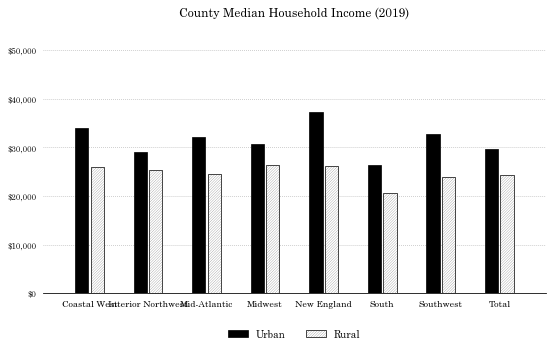

In [11]:
path = 'data_files/'
file = 'ch2_fig14'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

# set graph specs
width = 0.225
legendheight = -0.2
title = g.index.name#[:-11]
filename = file[:-4]
ylim = (0, g.max().max() * 1.5)
#ylim = (0, 1)
#ylim = (-.5, .5)


# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('$' + str((height)),
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.01),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)

fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x_metro = [x - width/2 - .02 for x in range(len(g.Urban))]
x_rural = [x + width/2 + .02 for x in range(len(g.Rural))]

bar1 = ax.bar(x_metro, g.Urban, width, zorder=3, label='Urban', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x_rural, g.Rural, width, zorder=3, label='Rural', color='white', edgecolor='black', hatch='/////////', lw=.7)
ax.bar(g.index, 0)

#autolabel(bar1)
#autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s
ax.set_yticklabels(['$' + '{:,.0f}'.format(x) for x in ax.get_yticks()])

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=ylim)
plt.show()

In [16]:
file

'ch2_fig14'

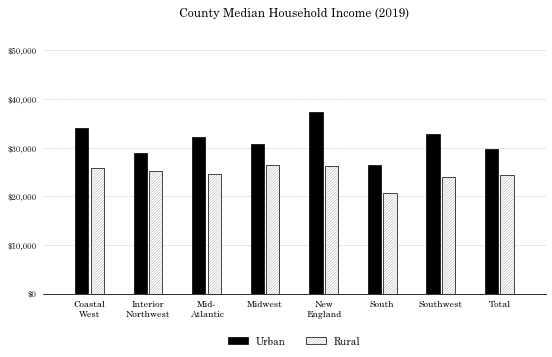

In [17]:
# if not, run this code to wrap text and adjust legend
chars = 5
positions = range(0, len(g.index))

ax.xaxis.set_major_locator(ticker.FixedLocator(positions))
wrap_labels(ax, chars)


lines = []
for label in ax.get_xticklabels():
    lines.append(str(label).count('\\n'))
    
if max(lines) == 1:
    legendheight = -0.225
elif max(lines) == 2:
    legendheight = -0.25
else:
    pass

ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
ax.get_figure().savefig('graphics/jpgs/' + file + '.jpg', dpi=600, bbox_inches='tight')
ax.get_figure().savefig('graphics/pdfs/' + file + '.pdf', dpi=600, bbox_inches='tight')
ax.figure

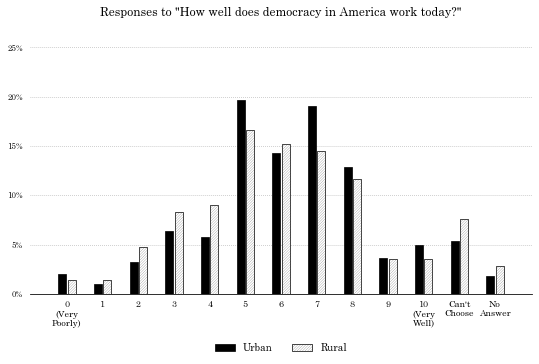

In [182]:
path = 'data_files/'
file = 'ch1_fig2'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(0, g.max().max() * 1.4)
chars=5
bartextheight_pos = (g.mean().mean() * 1.6) / 100
bartextheight_neg = .0075

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

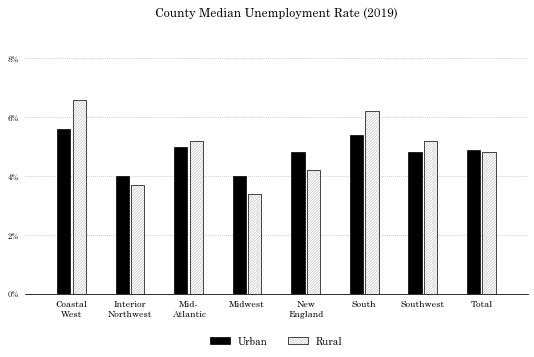

In [19]:
path = 'data_files/'
file = 'ch2_fig15'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(0, g.max().max() * 1.4)
chars=5
bartextheight_pos = (g.mean().mean() * 1.6) / 100
bartextheight_neg = .0075

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

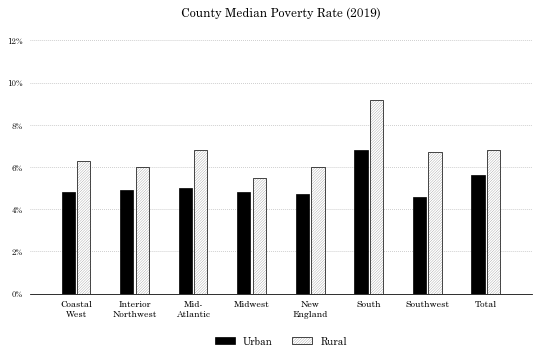

In [20]:
path = 'data_files/'
file = 'ch2_fig16'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(0, g.max().max() * 1.4)
chars=5
bartextheight_pos = (g.mean().mean() * 1.6) / 100
bartextheight_neg = .0075

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

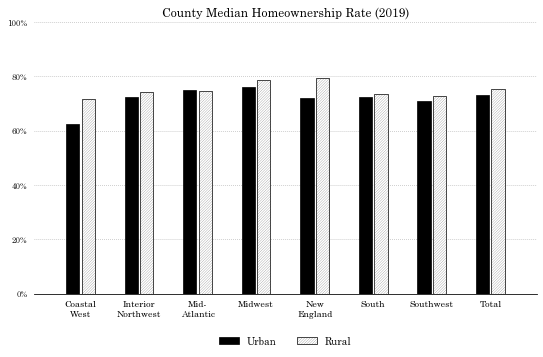

In [22]:
path = 'data_files/'
file = 'ch2_fig17'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(0, 1)
chars=5
bartextheight_pos = (g.mean().mean() * 1.6) / 100
bartextheight_neg = .0075

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

In [57]:
path = 'data_files/'
file = 'ch2_fig18'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

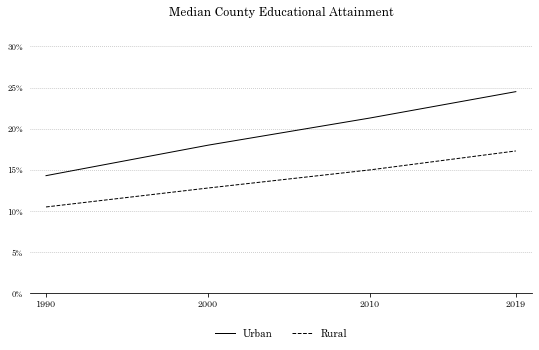

In [59]:
u = g.iloc[:,0:8]
r = g.iloc[:,8:]
r.columns = u.columns

# set graph specs
legendheight = -0.2
title = 'Median County Educational Attainment'
filename = file[:-4]

# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
    
line1 = ax.plot(u.iloc[:,-1], zorder=3, color='black', lw=1, label='Urban')
line1 = ax.plot(r.iloc[:,-1], zorder=3, color='black', lw=1, ls='--', label='Rural')
ax.bar(g.index, 0)
   
ax.set_title(title, fontproperties=prop, size=12)
ax.tick_params(axis='both', left=False, bottom=True) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   

ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

plt.xticks(ticks=[1990, 2000, 2010, 2019], labels=['1990', '2000', '2010', '2019'])

ax.set(ylim=(0, .33), xlim=(1989,2020))
plt.show()

ax.get_figure().savefig('graphics/jpgs/' + file + '.jpg', dpi=600, bbox_inches='tight')
ax.get_figure().savefig('graphics/pdfs/' + file + '.pdf', dpi=600, bbox_inches='tight')

In [60]:
path = 'data_files/'
file = 'ch2_fig19'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

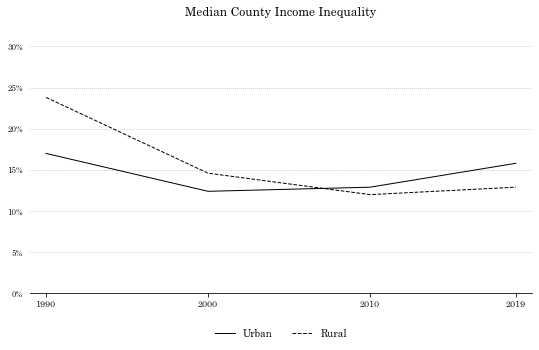

In [61]:
u = g.iloc[:,0:8]
r = g.iloc[:,8:]
r.columns = u.columns

# set graph specs
legendheight = -0.2
title = 'Median County Income Inequality'
filename = file[:-4]

# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
    
line1 = ax.plot(u.iloc[:,-1], zorder=3, color='black', lw=1, label='Urban')
line1 = ax.plot(r.iloc[:,-1], zorder=3, color='black', lw=1, ls='--', label='Rural')
ax.bar(g.index, 0)
   
ax.set_title(title, fontproperties=prop, size=12)
ax.tick_params(axis='both', left=False, bottom=True) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   

ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

plt.xticks(ticks=[1990, 2000, 2010, 2019], labels=['1990', '2000', '2010', '2019'])

ax.set(ylim=(0, .33), xlim=(1989,2020))
plt.show()

ax.get_figure().savefig('graphics/jpgs/' + file + '.jpg', dpi=600, bbox_inches='tight')
ax.get_figure().savefig('graphics/pdfs/' + file + '.pdf', dpi=600, bbox_inches='tight')

In [62]:
path = 'data_files/'
file = 'ch2_fig20'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

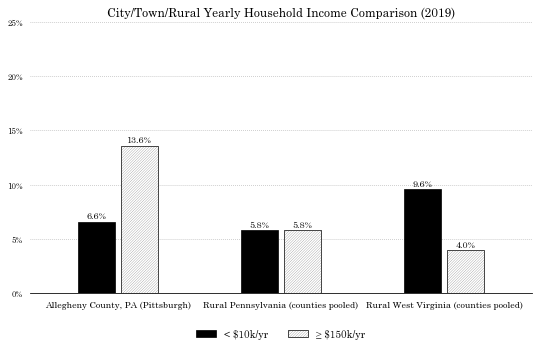

In [66]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.003),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x1 = [x - width/2 - .02 for x in range(len(g))]
x2 = [x + width/2 + .02 for x in range(len(g))]

bar1 = ax.bar(x1[:3], g.iloc[:3,0], width, zorder=3, label='< $10k/yr', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x2[:3], g.iloc[:3,1], width, zorder=3, label='≥ $150k/yr', color='white', edgecolor='black', hatch='/////////', lw=.7)
ax.bar(g.iloc[:3,0].index, 0)

autolabel(bar1)
autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

#plt.xticks(ticks=[4, 5.0, 6.0], labels=['Philadelphia County, PA\n(Philadelphia)', 'Rural Pennsylvania\n(counties pooled)'])
ax.set(ylim=(0, (g.max().max() * 1.2).round(2)))
plt.show()

In [68]:
# if not, run this code to wrap text and export
positions = range(0,len(g.iloc[:5].index))
ax.xaxis.set_major_locator(ticker.FixedLocator(positions))

wrap_labels(ax, 20)

legendheight = -0.225
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))

ax.figure

city = str(ax.get_xticklabels()).split('(')[2].split(')')[0][:3]

# export when perfect
ax.get_figure().savefig('graphics/jpgs/' + file + '_' + city + '.jpg', dpi=600, bbox_inches='tight')
ax.get_figure().savefig('graphics/pdfs/' + file + '_' + city + '.pdf', dpi=600, bbox_inches='tight')

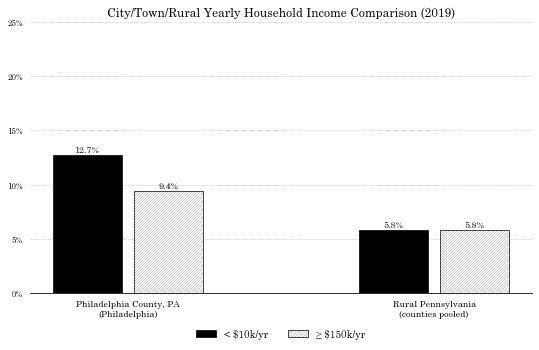

In [70]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.003),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x1 = [x - width/2 - .02 for x in range(len(g))]
x2 = [x + width/2 + .02 for x in range(len(g))]

bar1 = ax.bar(x1[5:7], g.iloc[5:7,0], width, zorder=3, label='< $10k/yr', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x2[5:7], g.iloc[5:7,1], width, zorder=3, label='≥ $150k/yr', color='white', edgecolor='black', hatch='/////////', lw=.7)
#ax.bar(g.iloc[5:7,0].index, 0)

autolabel(bar1)
autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.2).round(2)))
#ax.set(ylim=(0,.1))
plt.xticks(ticks=[5.0, 6.0], labels=['Philadelphia County, PA\n(Philadelphia)', 'Rural Pennsylvania\n(counties pooled)'])
plt.show()

city = str(ax.get_xticklabels()).split('(')[2].split(')')[0][:3]
# export when perfect
ax.get_figure().savefig('graphics/jpgs/' + file + '_' + city + '.jpg', dpi=600, bbox_inches='tight')
ax.get_figure().savefig('graphics/pdfs/' + file + '_' + city + '.pdf', dpi=600, bbox_inches='tight')

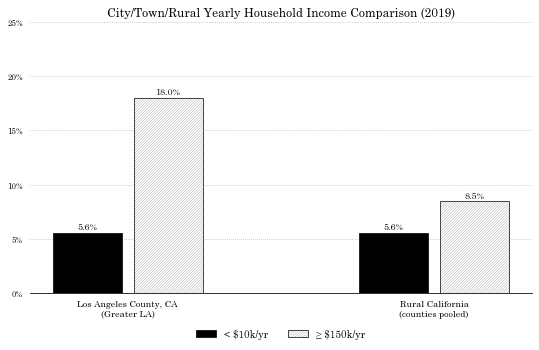

In [71]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.003),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x1 = [x - width/2 - .02 for x in range(len(g))]
x2 = [x + width/2 + .02 for x in range(len(g))]

bar1 = ax.bar(x1[8:10], g.iloc[8:10,0], width, zorder=3, label='< $10k/yr', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x2[8:10], g.iloc[8:10,1], width, zorder=3, label='≥ $150k/yr', color='white', edgecolor='black', hatch='/////////', lw=.7)
#ax.bar(g.iloc[5:7,0].index, 0)

autolabel(bar1)
autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.2).round(2)))
#ax.set(ylim=(0,.1))
plt.xticks(ticks=[8.0, 9.0], labels=['Los Angeles County, CA\n(Greater LA)', 'Rural California\n(counties pooled)'])
plt.show()

city = 'LA'
# export when perfect
ax.get_figure().savefig('graphics/jpgs/' + file + '_' + city + '.jpg', dpi=600, bbox_inches='tight')
ax.get_figure().savefig('graphics/pdfs/' + file + '_' + city + '.pdf', dpi=600, bbox_inches='tight')

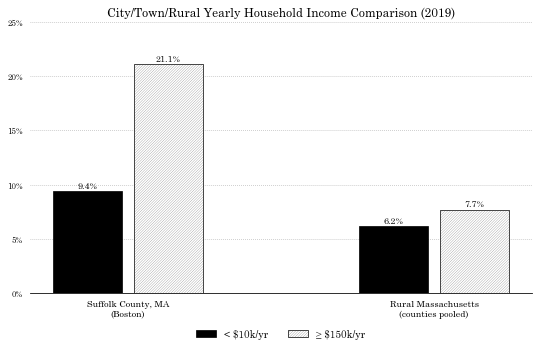

In [72]:
# set graph specs
legendheight = -0.2
width = 0.225
title = g.index.name
bartextsize = 9
filename = file[:-4]

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, height + 0.003),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
x1 = [x - width/2 - .02 for x in range(len(g))]
x2 = [x + width/2 + .02 for x in range(len(g))]

bar1 = ax.bar(x1[11:13], g.iloc[11:13,0], width, zorder=3, label='< $10k/yr', color='black', edgecolor='black', lw=.7)
bar2 = ax.bar(x2[11:13], g.iloc[11:13,1], width, zorder=3, label='≥ $150k/yr', color='white', edgecolor='black', hatch='/////////', lw=.7)
#ax.bar(g.iloc[5:7,0].index, 0)

autolabel(bar1)
autolabel(bar2)
    
ax.set_title(title, fontproperties=prop, size=12)
#ax.set_ylabel(ytitle, fontproperties=prop) # set title and font
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=len(g.columns))
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=(0, (g.max().max() * 1.2).round(2)))
#ax.set(ylim=(0,.1))
plt.xticks(ticks=[11.0, 12.0], labels=['Suffolk County, MA\n(Boston)', 'Rural Massachusetts\n(counties pooled)'])
plt.show()

city = str(ax.get_xticklabels()).split('(')[2].split(')')[0][:3]
# export when perfect
ax.get_figure().savefig('graphics/jpgs/' + file + '_' + city + '.jpg', dpi=600, bbox_inches='tight')
ax.get_figure().savefig('graphics/pdfs/' + file + '_' + city + '.pdf', dpi=600, bbox_inches='tight')

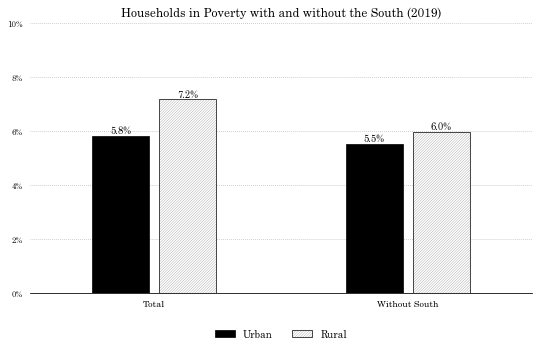

In [39]:
path = 'data_files/'
file = 'ch2_fig21'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(0, g.max().max() * 1.4)
chars=15
bartextheight_pos = (g.mean().mean() * 1.6) / 100
bartextheight_neg = .0075

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

In [74]:
path = 'data_files/'
file = 'ch2_fig24'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

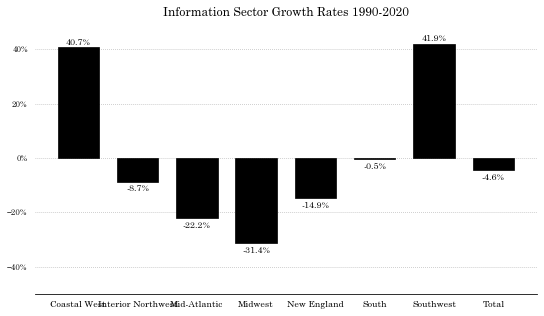

In [76]:
# set graph specs
legendheight = -0.25
width = 0.7
title = g.index.name
bartextsize = 9
ylim = (-.5, .5)

# define function to add label to top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            labelheight = height + .01
        else:
            labelheight = height - .035
        ax.annotate(str((height * 100).round(1)) + '%',
                    xy=(bar.get_x() + bar.get_width()/2, labelheight),
                    ha='center',
                    fontproperties=prop,
                    fontsize=bartextsize)
        
# define text wrapping function
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                                    break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0) 
    
fig, ax = plt.subplots(figsize=(9,5))
ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
plt.rcParams['hatch.linewidth'] = .15
    
bar1 = ax.bar(g.index, g.iloc[:,0], width, zorder=3, label=None, color='black', edgecolor='black', lw=.7)

autolabel(bar1)
    
ax.set_title(title, fontproperties=prop, size=12)
ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0)) # turn y axis decimals into %s

for label in ax.get_yticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(8) 
    
for label in ax.get_xticklabels():
    label.set_fontproperties(prop)
    label.set_fontsize(9)   
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

ax.set(ylim=ylim)
plt.show()

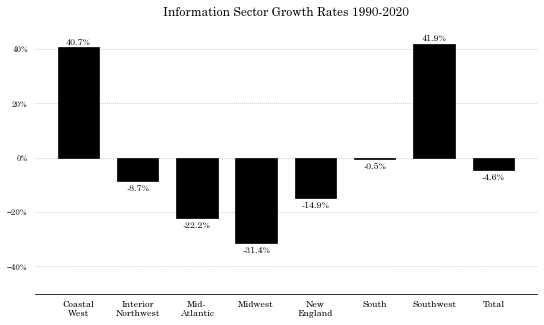

In [78]:
# if not, run this code to wrap text and adjust legend
chars = 5
positions = range(0, len(g.index))

ax.xaxis.set_major_locator(ticker.FixedLocator(positions))
wrap_labels(ax, chars)

lines = []
for label in ax.get_xticklabels():
    lines.append(str(label).count('\\n'))
    
if max(lines) == 1:
    legendheight = -0.225
elif max(lines) == 2:
    legendheight = -0.25
else:
    pass

ax.get_figure().savefig('graphics/jpgs/' + file + '.jpg', dpi=600, bbox_inches='tight')
ax.get_figure().savefig('graphics/pdfs/' + file + '.pdf', dpi=600, bbox_inches='tight')

ax.figure

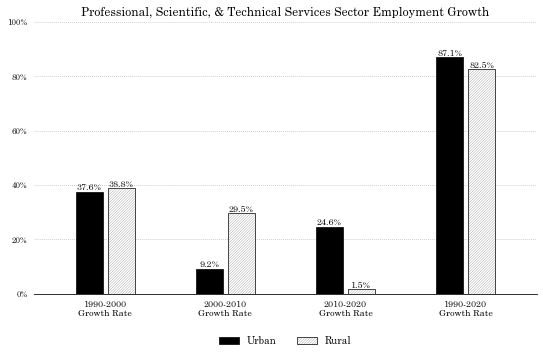

In [37]:
path = 'data_files/'
file = 'ch2_fig25'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(0, 1)
chars=15
bartextheight_pos = (g.mean().mean() * 1.6) / 100
bartextheight_neg = .0075

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

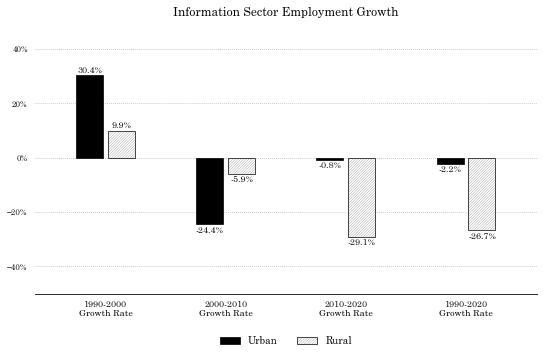

In [41]:
path = 'data_files/'
file = 'ch2_fig26'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(-.5, .5)
chars=15
bartextheight_pos = .01
bartextheight_neg = .03

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

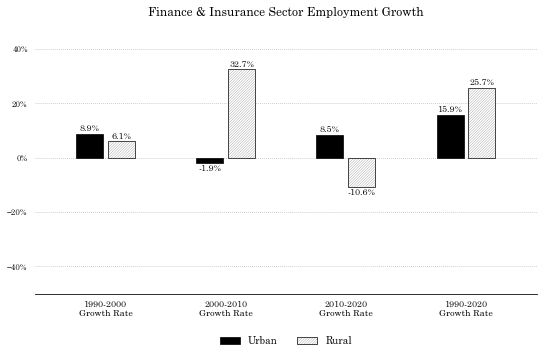

In [42]:
path = 'data_files/'
file = 'ch2_fig27'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(-.5, .5)
chars=15
bartextheight_pos = .01
bartextheight_neg = .03

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

## Chapter 6

In [82]:
files_ch6

['ch6_fig31.csv', 'ch6_fig32.csv', 'ch6_fig33.csv']

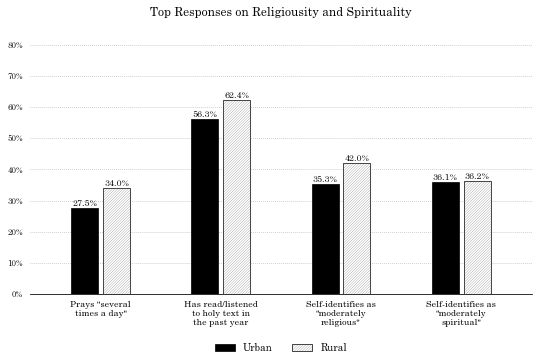

In [86]:
path = 'data_files/'
file = 'ch6_fig31'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(0, g.max().max() * 1.4)
chars=18
bartextheight_pos = (g.mean().mean() * 1.6) / 100
bartextheight_neg = .0075

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

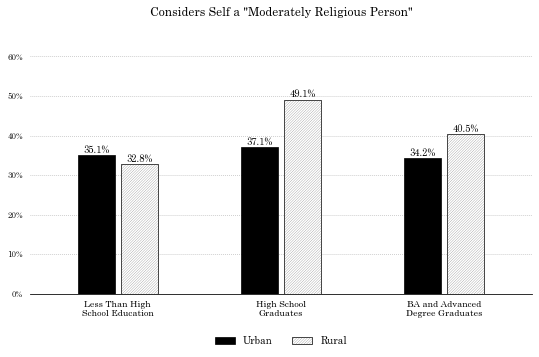

In [87]:
path = 'data_files/'
file = 'ch6_fig32'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(0, g.max().max() * 1.4)
chars=18
bartextheight_pos = (g.mean().mean() * 1.6) / 100
bartextheight_neg = .0075

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

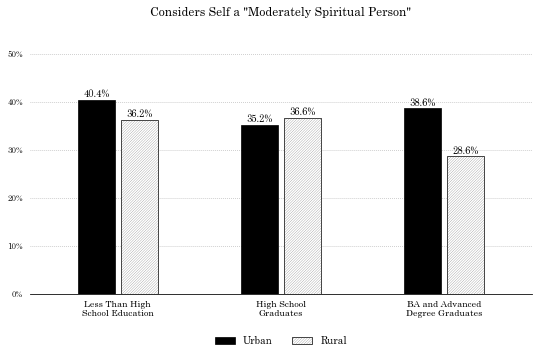

In [88]:
path = 'data_files/'
file = 'ch6_fig33'
g = pd.read_csv(path + file + '.csv')
g = g.set_index(g.iloc[:,0])
g = g.drop(g.iloc[:,0].name, axis=1)

ylim=(0, g.max().max() * 1.4)
chars=18
bartextheight_pos = (g.mean().mean() * 1.6) / 100
bartextheight_neg = .0075

graph_pct_dbl(g, ylim, chars, file, bartextheight_pos, bartextheight_neg)

## Chapter 7

In [92]:
file = files_ch7[0]

In [93]:
s = pd.read_csv(path + file)
s = s.set_index(s.iloc[:,0])
s = s.drop(s.iloc[:,0].name, axis=1)
s

,Urban,Rural,<$25k,≥$100k,<BA,≥BA
High and Low Cultural Capital Goods Expenditure,,,,,,
Soft Drinks,0.0210,0.0230,0.0267,0.0197,0.0247,0.0202
Tobacco,0.0004,0.0007,0.0013,0.0003,0.0009,0.0004
Frozen Meals,0.0340,0.0340,0.0390,0.0300,0.0360,0.0330
Organic Milk,0.0340,0.0190,0.0140,0.0440,0.0170,0.0320
Fresh Vegetables,0.0150,0.0150,0.0120,0.0170,0.0130,0.0160


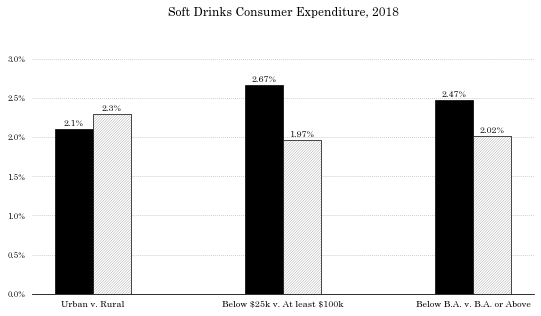

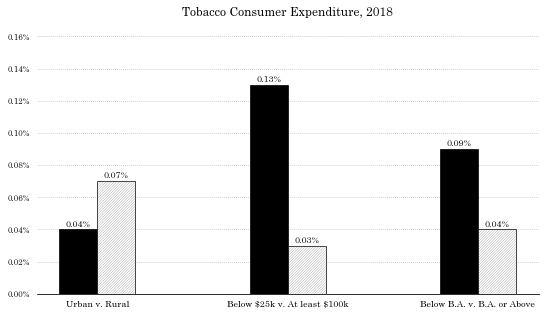

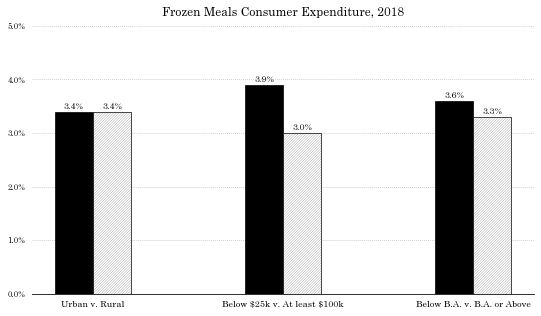

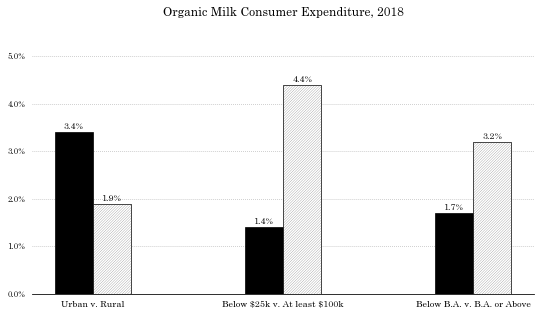

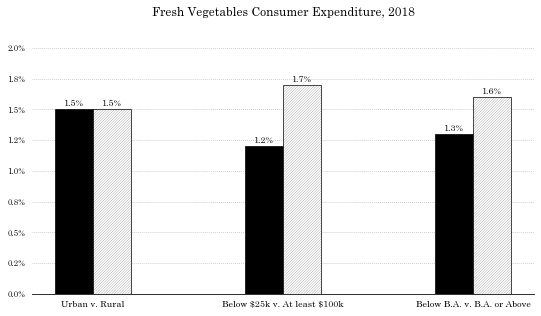

In [94]:
# set graph specs
#legendheight = -0.2
w = 0.2
bartextsize = 9
filename = file[:-4]

for col in s.T.columns:
    
    g = s.T.loc[:, col]
    
    fig, ax = plt.subplots(figsize=(9,5))
    ax.grid(visible=None, which='major', axis='y', linestyle = ':', linewidth = .75, zorder=0)
    plt.rcParams['hatch.linewidth'] = .15

    bar1 = ax.bar(0 - w/2, g.iloc[0], w, zorder=3, label='Urban', color='black', edgecolor='black', lw=.7)
    bar2 = ax.bar(0 + w/2, g.iloc[1], w, zorder=3, label='Rural', color='white', edgecolor='black', hatch='/////////', lw=.7)
    bar3 = ax.bar(1 - w/2, g.iloc[2], w, zorder=3, label='<$25k', color='black', edgecolor='black', lw=.7)
    bar4 = ax.bar(1 + w/2, g.iloc[3], w, zorder=3, label='≥$100k', color='white', edgecolor='black', hatch='/////////', lw=.7)
    bar5 = ax.bar(2 - w/2, g.iloc[4], w, zorder=3, label='<BA', color='black', edgecolor='black', lw=.7)
    bar6 = ax.bar(2 + w/2, g.iloc[5], w, zorder=3, label='≥BA', color='white', edgecolor='black', hatch='/////////', lw=.7)

    # define function to add label to top of bars
    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(str((height * 100).round(2)) + '%',
                        xy=(bar.get_x() + bar.get_width()/2, height + (g.max() * .015)),
                        ha='center',
                        fontproperties=prop,
                        fontsize=bartextsize)
            
    autolabel(bar1)
    autolabel(bar2)
    autolabel(bar3)
    autolabel(bar4)
    autolabel(bar5)
    autolabel(bar6)
    
    if g.max() < 0.01:
        decimal=2
    else:
        decimal=1
    
    title = col + ' Consumer Expenditure, 2018'
    ax.set_title(title, fontproperties=prop, size=12)
    ax.tick_params(axis='both', left=False, bottom=False) # remove Y axis ticks
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=decimal)) # turn y axis decimals into %s

    for label in ax.get_yticklabels():
        label.set_fontproperties(prop)
        label.set_fontsize(8) 
    
    for label in ax.get_xticklabels():
        label.set_fontproperties(prop)
        label.set_fontsize(9)   
    
    plt.xticks(ticks=[0, 1, 2], labels=['Urban v. Rural',
                                        'Below \$25k v. At least $100k',
                                        'Below B.A. v. B.A. or Above'])

    #ax.legend(prop=prop, loc='lower center', bbox_to_anchor=(0.5, legendheight), frameon=False, ncol=3)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)

    ax.set(ylim=(0, g.max()*1.3))

    plt.show()
    
    # if good, export
    ax.get_figure().savefig('graphics/jpgs/' + file + '_' + col + '.jpg', dpi=600, bbox_inches='tight')
    ax.get_figure().savefig('graphics/pdfs/' + file + '_' + col + '.pdf', dpi=600, bbox_inches='tight')